In [1]:
from eeg_lib.data.data_setup import TripletEEGDataset
from eeg_lib.data.data_loader.EEGDataExtractor import EEGDataExtractor
from eeg_lib.models.verification.EEGNet import EEGNetEmbeddingModel
from eeg_lib.commons.constant import DATASETS_FOLDER


from eeg_lib.utils.helpers import create_writer, split_train_test
from eeg_lib.utils.engine import train_triplet_model, extract_embeddings, verify_sample, create_user_profiles, verify_test_sample

from eeg_lib.utils.visualisations import visualize_umap, visualize_tsne, calculate_and_plot_distances

import torch
import torch.nn as nn
from torch.utils.data import DataLoader


/Users/gsk/documents/projects/artificial-intelligence/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
DATA_DIR = f"{DATASETS_FOLDER}/Kolory/"

extractor = EEGDataExtractor(data_dir=DATA_DIR)
eeg_df, participants = extractor.extract_dataframe()

Opening raw data file /Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/46607ce4@1717.fif...
    Range : 0 ... 194099 =      0.000 ...   776.396 secs
Ready.
Reading 0 ... 194099  =      0.000 ...   776.396 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters


/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/46607ce4@1717.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)
/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/bf2d2193@1638.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_r

    Range : 0 ... 215024 =      0.000 ...   860.096 secs
Ready.
Reading 0 ... 215024  =      0.000 ...   860.096 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) met

/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/e43a9f9f@0941.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


0 bad epochs dropped
Opening raw data file /Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/51ec2c20@0923.fif...
    Range : 0 ... 225674 =      0.000 ...   902.696 secs
Ready.
Reading 0 ... 225674  =      0.000 ...   902.696 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

F

/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/51ec2c20@0923.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)
/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/90441f44@1643.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_r

- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Used Annotations descriptions: ['blue', 'break', 'gray', 'green', 'red', 'yellow']
Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped

/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/f82b5699@1757.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)
/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/39285860@1825.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_r

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Used Annotations descriptions: ['blue', 'break', 'gray', 'green', 'red', 'yellow']
Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped
Opening raw data file /Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/54e60118@1339.fif...
    Range : 0 ... 198

/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/54e60118@1339.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)
/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/022e8467@1910.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_r

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower tran

/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/ffae50df@1712.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)
/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/3033b74a@1626.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_r

- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Used Annotations descriptions: ['blue', 'break', 'gray', 'green', 'red', 'yellow']
Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activate

/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/e283301e@1606.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)
/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/6e542bc2@0845.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_r

    Range : 0 ... 198649 =      0.000 ...   794.596 secs
Ready.
Reading 0 ... 198649  =      0.000 ...   794.596 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) met

/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/06f240e9@1215.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)
/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/8bd3032e@1746.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_r

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Used Annotations descriptions: ['blue', 'break', 'gray', 'green', 'red', 'yellow']
Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped
Opening raw data file /Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/548fd734@1628.fif...
    Range : 0 ... 212

/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/548fd734@1628.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)
/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/6d9a8b86@1613.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_r

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Used Annotations descriptions: ['blue', 'break', 'gray', 'green', 'red', 'yellow']
Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped
Opening raw data file /Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/fd8a3308@1135.fif...
    Range : 0 ... 228

/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/fd8a3308@1135.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)
/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/011595b1@1651.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_r

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Used Annotations descriptions: ['blue', 'break', 'gray', 'green', 'red', 'yellow']
Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped
Opening raw data file /Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/d87e1bd3@1806.fif...
    Range : 0 ... 201

/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/d87e1bd3@1806.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)
/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/e08138e2@1731.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_r

In [3]:
eeg_df.head()

,participant_id,epoch,label
0,46607ce4@1717,"[[-9.24481589731569e-06, -9.598635937503012e-0...",gray
1,46607ce4@1717,"[[-2.0148758591275883e-06, -1.1913500968321893...",green
2,46607ce4@1717,"[[-1.7344745961061525e-07, 1.012701607648391e-...",gray
3,46607ce4@1717,"[[4.047473978354836e-06, 2.417326642595136e-06...",blue
4,46607ce4@1717,"[[-8.859812648227801e-06, -1.0092267325555332e...",gray


In [4]:
print(eeg_df.columns)

Index(['participant_id', 'epoch', 'label'], dtype='object')


In [5]:
train_df, test_df, train_participants, test_participants = split_train_test(eeg_df=eeg_df, test_size=0.25, random_state=42)

Training set participants: ['8dca0725@1418' '46607ce4@1717' '51ec2c20@0923' 'e283301e@1606'
 '90441f44@1643' 'ffae50df@1712' '022e8467@1910' '548fd734@1628'
 'bf2d2193@1638' '9e8bae0e@1828' 'fd8a3308@1135' 'e43a9f9f@0941'
 'b34b1427@0906' '011595b1@1651' '2882ae26@1441' 'e08138e2@1731'
 '8bd3032e@1746' 'f82b5699@1757' '54e60118@1339' '3033b74a@1626'
 '06f240e9@1215' '25d0bdb3@1318']
Test set participants: ['446b3735@1618' '2718372d@1400' '6d9a8b86@1613' '6e542bc2@0845'
 '39285860@1825' '36eea4bb@1519' 'd87e1bd3@1806' '541c91f2@1456']


In [6]:
triplet_train_dataset = TripletEEGDataset(train_df)
triplet_train_loader = DataLoader(triplet_train_dataset, batch_size=8, shuffle=True)

model = EEGNetEmbeddingModel(
    num_channels=4, num_time_points=751, num_classes=0, embedding_dimension=32
)

triplet_loss_fn = nn.TripletMarginLoss(margin=0.05)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

NUM_EPOCHS = 49

writer = create_writer("EEGNet Triplet Loss", "EEGNet", "First attempt on triplet loss")
results, writer = train_triplet_model(model, triplet_train_loader, triplet_loss_fn, optimizer, NUM_EPOCHS, writer)

[INFO] Created SummaryWriter, saving to: /Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/result_summaries/runs/2025-03-15/EEGNet Triplet Loss/EEGNet/First attempt on triplet loss...


/Users/gsk/documents/projects/artificial-intelligence/venv/lib/python3.12/site-packages/torch/nn/init.py:511: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")
/Users/gsk/documents/projects/artificial-intelligence/venv/lib/python3.12/site-packages/torch/nn/modules/conv.py:549: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/Convolution.cpp:1037.)
  return F.conv2d(


Epoch 1, Average Loss: 0.0941
Epoch 2, Average Loss: 0.0601
Epoch 3, Average Loss: 0.0514
Epoch 4, Average Loss: 0.0491
Epoch 5, Average Loss: 0.0455
Epoch 6, Average Loss: 0.0381
Epoch 7, Average Loss: 0.0316
Epoch 8, Average Loss: 0.0270
Epoch 9, Average Loss: 0.0247
Epoch 10, Average Loss: 0.0226
Epoch 11, Average Loss: 0.0205
Epoch 12, Average Loss: 0.0201
Epoch 13, Average Loss: 0.0200
Epoch 14, Average Loss: 0.0189
Epoch 15, Average Loss: 0.0188
Epoch 16, Average Loss: 0.0184
Epoch 17, Average Loss: 0.0183
Epoch 18, Average Loss: 0.0175
Epoch 19, Average Loss: 0.0170
Epoch 20, Average Loss: 0.0180
Epoch 21, Average Loss: 0.0163
Epoch 22, Average Loss: 0.0164
Epoch 23, Average Loss: 0.0168
Epoch 24, Average Loss: 0.0161
Epoch 25, Average Loss: 0.0165
Epoch 26, Average Loss: 0.0157
Epoch 27, Average Loss: 0.0156
Epoch 28, Average Loss: 0.0158
Epoch 29, Average Loss: 0.0164
Epoch 30, Average Loss: 0.0153
Epoch 31, Average Loss: 0.0154
Epoch 32, Average Loss: 0.0155
Epoch 33, Average

In [7]:

embeddings_array, participant_ids_array = extract_embeddings(model, test_df)

In [8]:
user_profiles = create_user_profiles(embeddings_array, participant_ids_array)

In [9]:
sample_index = 0
threshold = 0.5
accepted, distance = verify_test_sample(test_df, model, user_profiles, sample_index, threshold)
print(f"Sample {sample_index} verification result: {'Accepted' if accepted else 'Rejected'}, Distance: {distance}")

Sample 0 verification result: Accepted, Distance: 0.09513533115386963


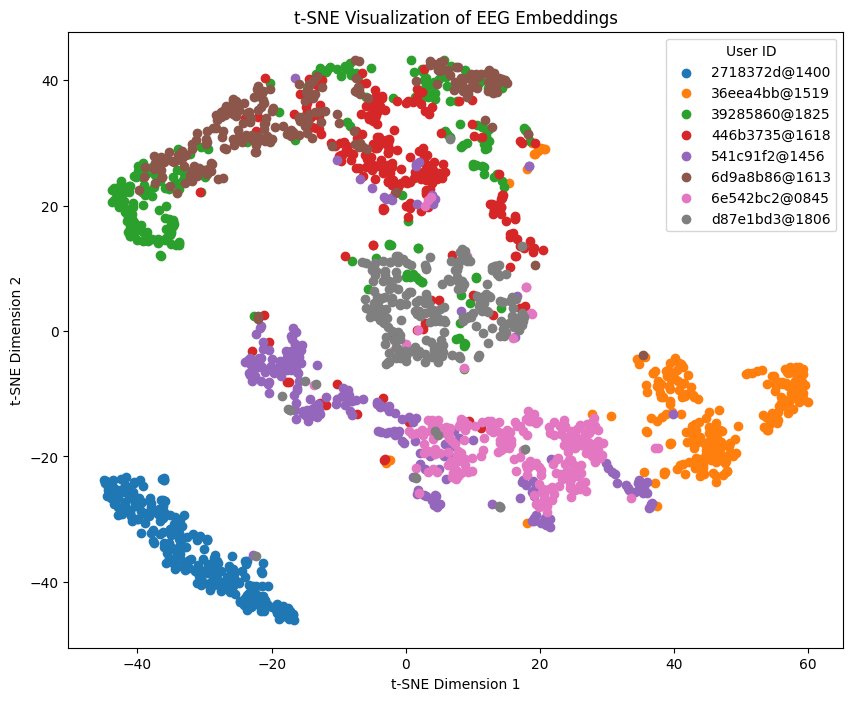

In [10]:
visualize_tsne(embeddings_array, participant_ids_array)

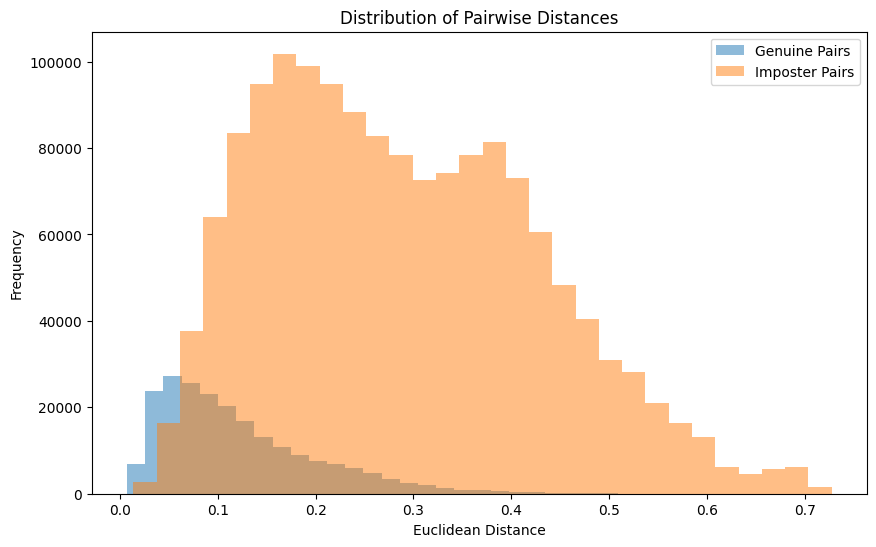

In [11]:



genuine_distances, imposter_distances = calculate_and_plot_distances(embeddings_array, participant_ids_array)

/Users/gsk/documents/projects/artificial-intelligence/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gsk/documents/projects/artificial-intelligence/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


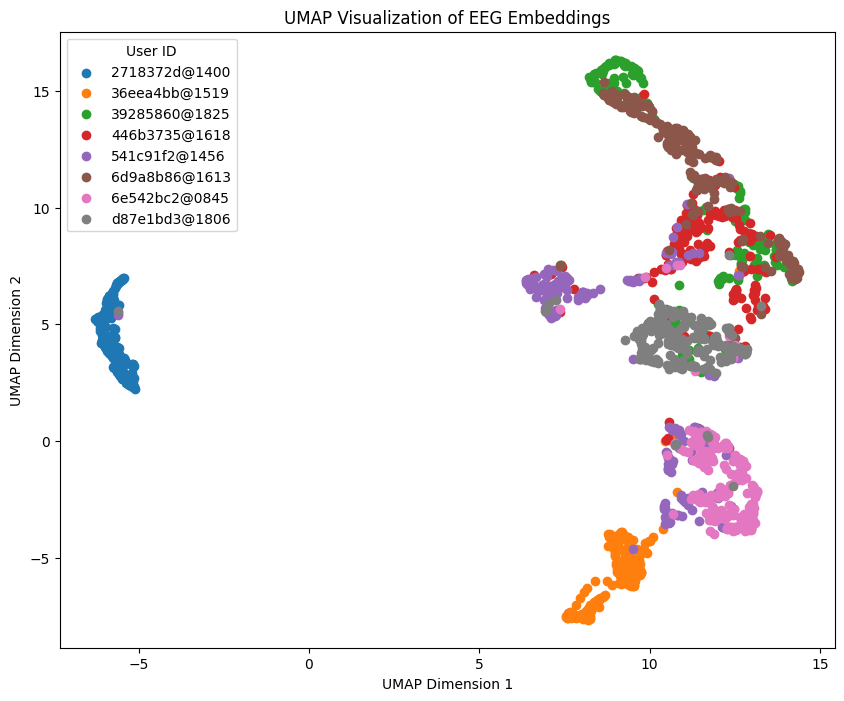

In [12]:
visualize_umap(embeddings_array, participant_ids_array)